In [118]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters.rank import entropy 
from skimage.morphology import disk 
from skimage.color import rgb2gray 
import matplotlib.image as matim
from skimage import io
from skimage import measure

In [38]:
image = io.imread('lab12_image_processing\head_by_Ron_Mueck.jpg')
print('image loaded')

In [85]:
#plt.imshow(gray_image, cmap = 'binary')
val = 70
bwimage1 = (image < val)
bwimage2 = (image >= val)
gray_image_light = rgb2gray(bwimage1) 
gray_image_dark = rgb2gray(bwimage2) 
entropy_image = entropy(gray_image_dark, disk(10))


c:\Users\Tyler Marino\OneDrive\Desktop\EPS109\EPSvenv\Lib\site-packages\IPython\core\interactiveshell.py:3508: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


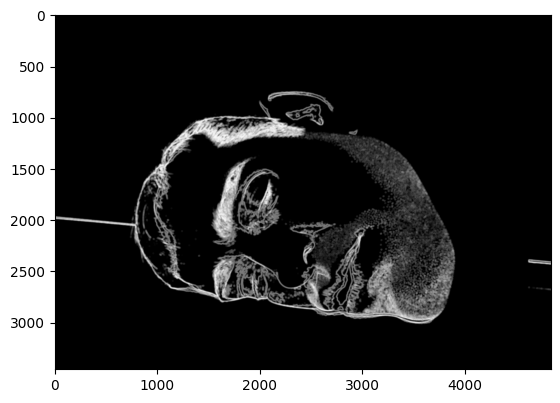

In [86]:
plt.imshow(entropy_image, cmap = 'gray')   #Change gray to binary for cool

In [93]:
sum = 0
for i in entropy_image.flatten():
    sum = sum + i
print('the percent with hair is:', 100*sum/len(entropy_image.flatten()))

the percent with hair is: 12.176501605036595


We may be inacurate in our estimation, because in the photo of the sculpture there may be shadows which resemeble hair on the face through creating a dark color. This will then prompt the head to 'have hair' in places that it doesn't actually.

image loaded


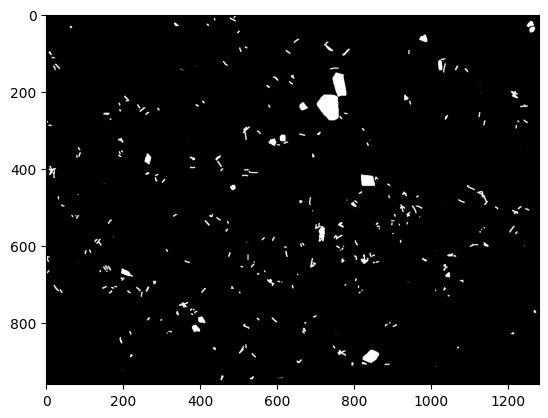

In [131]:
pumice_sec = io.imread('lab12_image_processing\\3.jpg')
print('image loaded')
plt.imshow(pumice_sec, cmap='gray')

#plt.imshow(gray_image, cmap = 'binary')
val = 60

bwpumice1 = (pumice_sec < val)
bwpumice2 = (pumice_sec >= val)
graypumice = (pumice_sec < 200) * (pumice_sec > 150)
#light_pumice = rgb2gray(bwpumice1) 
#dark_pumice = rgb2gray(bwpumice2) 
plt.imshow(graypumice, cmap='gray')

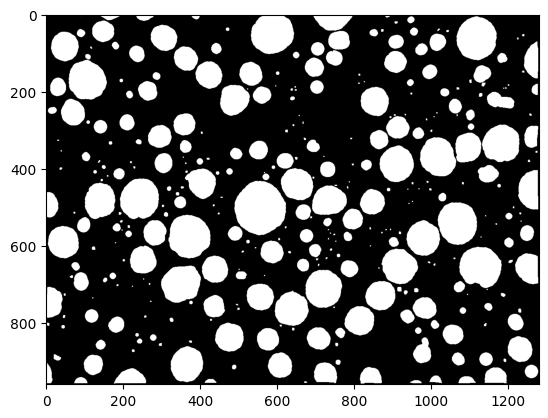

In [284]:
plt.imshow(bwpumice1, cmap='gray')

In [133]:
labels_hole = measure.label(bwpumice1)
lables_crystal = measure.label(graypumice)
props_holes = measure.regionprops(labels_hole)
props_crystals = measure.regionprops(lables_crystal)

In [135]:
print(f'There are {len(props_holes)} bubles in the pumice')
print(f'There are {len(props_crystals)} grains in the pumice')

There are 339 bubles in the pumice
There are 296 grains in the pumice


In [170]:
holes_areas = []
holes_area_summed = 0
for p in props_holes:
    holes_areas.append(p.area)
    holes_area_summed += int(p.area)


grains_areas = []
grains_area_summed = 0
for p in props_crystals:
    grains_areas.append(p.area)
    grains_area_summed += int(p.area)

print(grains_areas)

[43.0, 62.0, 23.0, 193.0, 73.0, 26.0, 29.0, 180.0, 31.0, 279.0, 59.0, 180.0, 27.0, 43.0, 111.0, 53.0, 35.0, 47.0, 27.0, 293.0, 58.0, 80.0, 64.0, 45.0, 2.0, 51.0, 71.0, 10.0, 47.0, 2.0, 1608.0, 58.0, 66.0, 43.0, 2.0, 42.0, 203.0, 2.0, 2903.0, 115.0, 82.0, 33.0, 34.0, 301.0, 28.0, 43.0, 36.0, 30.0, 79.0, 65.0, 30.0, 24.0, 42.0, 44.0, 80.0, 29.0, 59.0, 36.0, 18.0, 33.0, 46.0, 47.0, 21.0, 29.0, 29.0, 201.0, 30.0, 45.0, 51.0, 54.0, 239.0, 91.0, 258.0, 4.0, 1.0, 43.0, 33.0, 27.0, 2.0, 1.0, 33.0, 20.0, 28.0, 46.0, 319.0, 47.0, 26.0, 33.0, 92.0, 78.0, 68.0, 256.0, 45.0, 32.0, 38.0, 78.0, 51.0, 31.0, 923.0, 53.0, 47.0, 46.0, 44.0, 3.0, 30.0, 153.0, 83.0, 243.0, 36.0, 78.0, 7.0, 26.0, 26.0, 27.0, 69.0, 1.0, 1.0, 6.0, 64.0, 51.0, 33.0, 1.0, 111.0, 34.0, 119.0, 80.0, 62.0, 36.0, 41.0, 40.0, 1.0, 2.0, 92.0, 7.0, 76.0, 38.0, 53.0, 26.0, 22.0, 9.0, 38.0, 8.0, 1.0, 48.0, 52.0, 69.0, 27.0, 26.0, 112.0, 20.0, 30.0, 24.0, 612.0, 15.0, 27.0, 75.0, 12.0, 15.0, 34.0, 9.0, 15.0, 28.0, 12.0, 122.0, 4.0, 41.0,

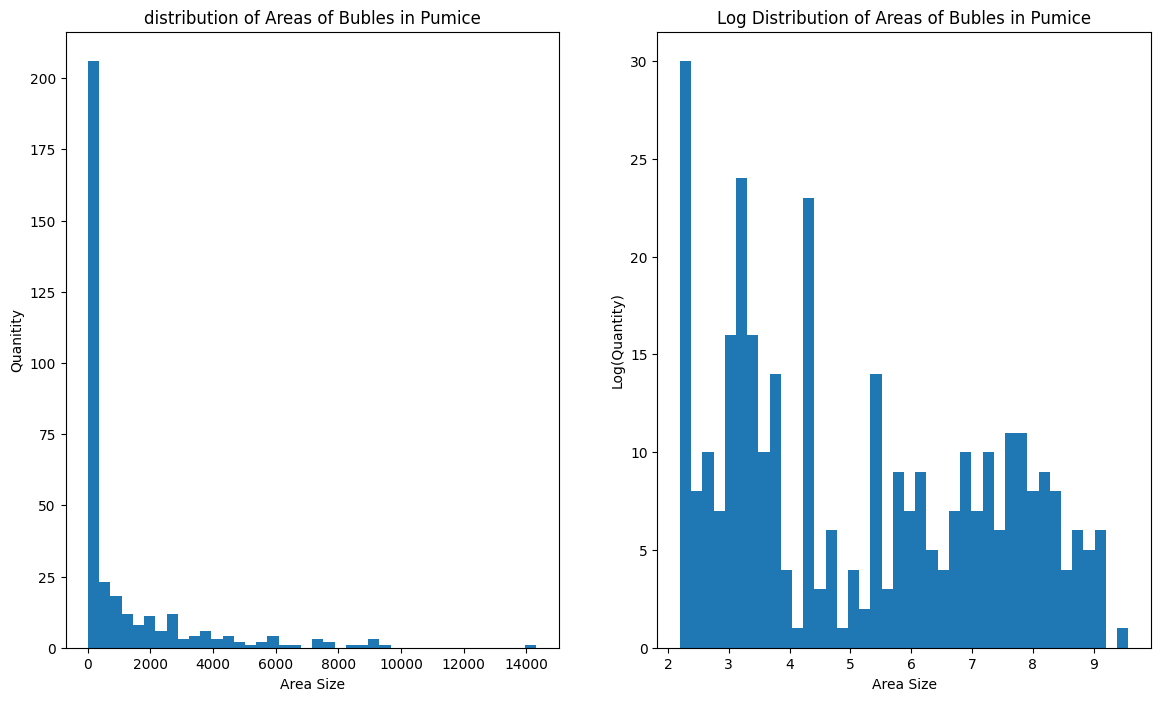

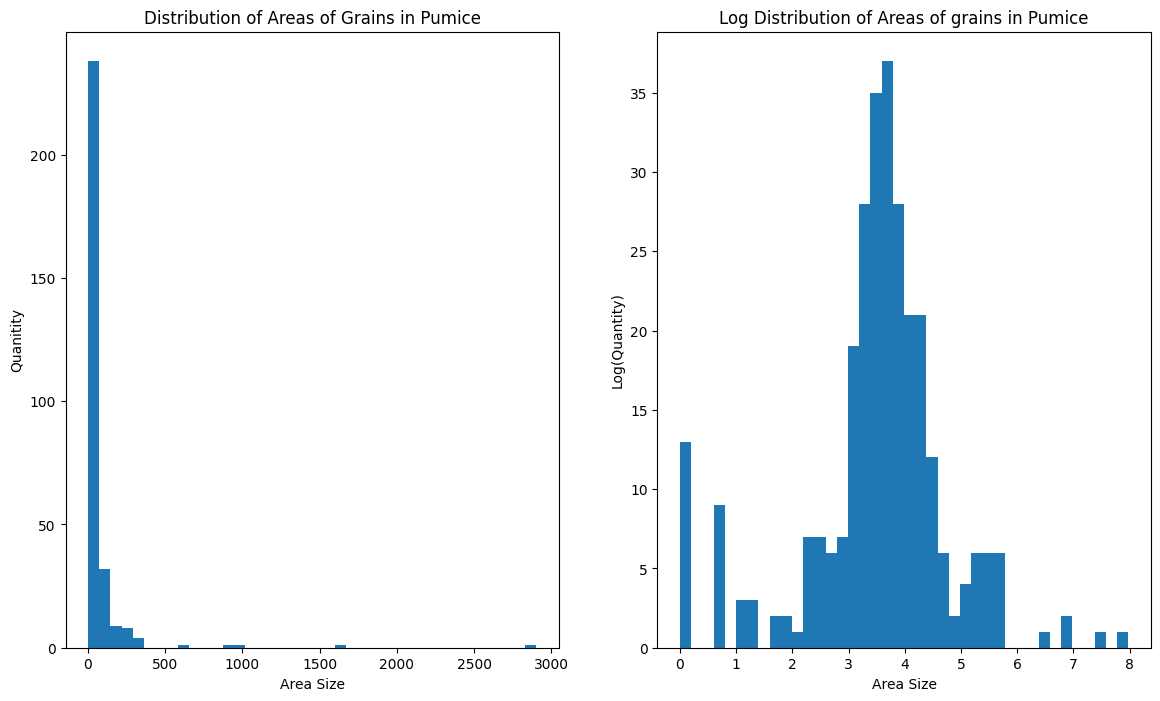

In [146]:


log_holes_areas = np.log(holes_areas)
fig = plt.figure(figsize=(14,8))
fig.add_subplot(1,2, 1)
plt.hist(holes_areas, bins=40)
plt.title('distribution of Areas of Bubles in Pumice')
plt.xlabel('Area Size')
plt.ylabel('Quanitity')

fig.add_subplot(1,2, 2)
plt.hist(log_holes_areas, bins=40)
plt.title('Log Distribution of Areas of Bubles in Pumice')
plt.xlabel('Area Size')
plt.ylabel('Log(Quantity)')

plt.show()



log_grain_areas = np.log(grains_areas)
fig = plt.figure(figsize=(14,8))
fig.add_subplot(1,2, 1)
plt.hist(grains_areas, bins=40)
plt.title('Distribution of Areas of Grains in Pumice')
plt.xlabel('Area Size')
plt.ylabel('Quanitity')

fig.add_subplot(1,2, 2)
plt.hist(log_grain_areas, bins=40)
plt.title('Log Distribution of Areas of grains in Pumice')
plt.xlabel('Area Size')
plt.ylabel('Log(Quantity)')

plt.show()

#plt.hist(holes_areas, bins = 40)

In [175]:
total_area = holes_area_summed + grains_area_summed

# grain_area = np.sum(grains_areas)
# bubble_area = np.sum(holes_areas)
print(f'The total area of the bubbles and grains are {holes_area_summed, grains_area_summed} respectively')
print(f'The total area of bubbles and grains is {total_area}. This makes up {round(100*total_area/(np.shape(pumice_sec)[0]*np.shape(pumice_sec)[1]))}%')

The total area of the bubbles and grains are (381744, 22475) respectively
The total area of bubbles and grains is 404219. This makes up 33%


In [200]:
# Import the necessary packages
import numpy as np
from matplotlib import pyplot as plt

from skimage import io
from skimage import img_as_ubyte, img_as_uint, img_as_float64

from skimage import data,exposure
from skimage.transform import rotate

# from sklearn.cluster import KMeans
import argparse

#PIL packages
from PIL import Image

def plot_channel_intensities(image):

    # plot the distribution of intensities for each of the three bands in the
    # image.

    red = image[:,:,0]
    green = image[:,:,1]
    blue = image[:,:,2]

    mask = ( red + green + blue ) > 0

    fig, ax_hist = plt.subplots(1, 1, figsize=(6, 5))

    # histogram of each
    ax_hist.hist(red[mask].ravel(), bins=256, histtype='step', color='red')
    ax_hist.hist(green[mask].ravel(), bins=256, histtype='step', color='green')
    ax_hist.hist(blue[mask].ravel(), bins=256, histtype='step', color='blue')

    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))

    ax_hist.set_ylabel('Pixel Count')
    ax_hist.set_xlabel('Pixel intensity')

def rescale_intensities(image,flow,fhigh):

    # Scale the intensities for each channel of an R B G image given an upper
    # and lower percentaile and return the re-scaled image.

    red = image[:,:,0]
    green = image[:,:,1]
    blue = image[:,:,2]

    mask = ( red + green + blue ) > 0

    # Pick percentile overwhich to rescale intensities
    #flow = 2
    #fhigh = 98

    plow, phigh = np.percentile(red[mask], (flow, fhigh))
    ls_red_rs= exposure.rescale_intensity(red, in_range=(plow, phigh))

    plow, phigh = np.percentile(green[mask], (flow, fhigh))
    ls_green_rs= exposure.rescale_intensity(green, in_range=(plow, phigh))

    plow, phigh = np.percentile(blue[mask], (flow, fhigh))
    ls_blue_rs= exposure.rescale_intensity(blue, in_range=(plow, phigh))

    # Define empty image
    nx,ny = ls_red_rs.shape
    ls_rgb_stretched = np.zeros([nx,ny,3],dtype=np.float64)

    # set all 3 channels of the image
    ls_rgb_stretched[:,:,0] = ls_red_rs
    ls_rgb_stretched[:,:,1] = ls_green_rs
    ls_rgb_stretched[:,:,2] = ls_blue_rs

    return  ls_rgb_stretched

def prepare_landsat_image(bands):

    # prepare a false color image for a combination of 3 landsat bands
    # Note this is specific to the set of images we provided, and the
    # hardcoded values for rotating need to be changed if you download a new
    # set of landsat images.

    ls_red = io.imread('landsat_band'+str(bands[0])+'.tif') # red
    ls_green = io.imread('landsat_band'+str(bands[1])+'.tif') # green
    ls_blue = io.imread('landsat_band'+str(bands[2])+'.tif') # blue

    ls_red = img_as_float64(ls_red)
    ls_green = img_as_float64(ls_green)
    ls_blue = img_as_float64(ls_blue)

    nx,ny = ls_red.shape
    ls_false = np.zeros([nx,ny,3],dtype=np.float64)

    ls_false[:,:,0] = ls_red
    ls_false[:,:,1] = ls_green
    ls_false[:,:,2] = ls_blue

    flow = 2
    fhigh = 98

    ls_false_rescale = rescale_intensities(ls_false,flow,fhigh)

    angle = 12.8
    ls_false_rescale = rotate(ls_false_rescale, angle)

    left = 124
    right = 1345

    top = 122
    bottom = 1378

    ls_false_rescale = ls_false_rescale[top:bottom,left:right]

    return ls_false_rescale


def bar_plot_with_colors(hist,colors,labels):

    # Matplotlib takes an RGB *fraction* as input for colors
    cm = [tuple(1.*np.array(c)/255.) for c in colors] # Matplotlib colormap takes a fraction

    plt.figure(figsize=(10, 3))
    plt.title('Fractional area of color clusters')
    plt.subplot(121)
    plt.bar(labels,hist,color=cm)

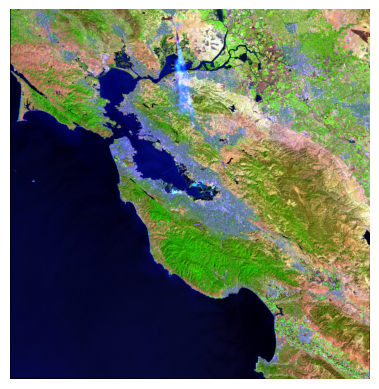

In [199]:
bands = [6,5,2]
# for band_num in np.arange(1,12):
#     band = io.imread('lab12_image_processing\\landsat_band'+str(band_num)+'.tif')
#     print(f'processed band {band_num}')
#     bands.append(band)
# fig, ax = plt.subplot(1,1, figsize =(10,10))
ls_false = prepare_landsat_image(bands)
plt.axis('off')
plt.imshow(ls_false)
plt.show()

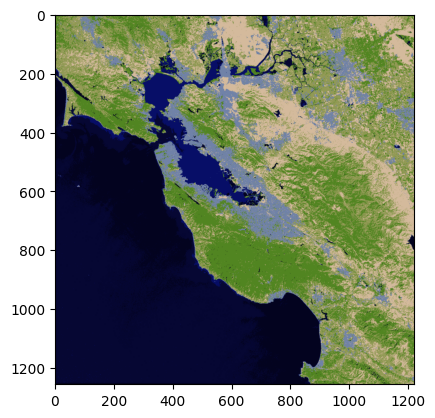

In [206]:
imageRGB = Image.fromarray(img_as_ubyte(ls_false))
imageIndexed = imageRGB.quantize(colors = 7, kmeans = 1)
rgbFromIndexed = imageIndexed.convert('RGB')
#plt.imshow(imageIndexed)
colorsRGB= rgbFromIndexed.getcolors()
colorsInd = imageIndexed.getcolors()


(7,)


<BarContainer object of 7 artists>

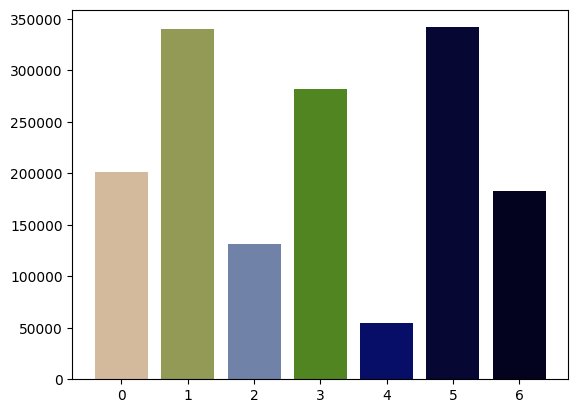

In [271]:
colors_shiz = [[range(7)], [201419, 339912, 131000, 281882, 54747, 341886, 182730], [[212,186,156], [146, 154, 85], [112, 130, 168], [81, 133, 33], [7, 14, 103], [6, 7, 51], [3,3,31]]]


cm = [tuple(1*np.array(c)/255) for c in colors_shiz[2]]

print(np.shape(np.array(colors_shiz[1])))

vals = [int(c) for c in colors_shiz[1]]
vals = np.array(vals)
plt.bar(x=range(7), height=vals, color=cm)

The percent of land in the image is 43.8407356400987%
The fraction of land covered by urban space is 19.484450367452936%


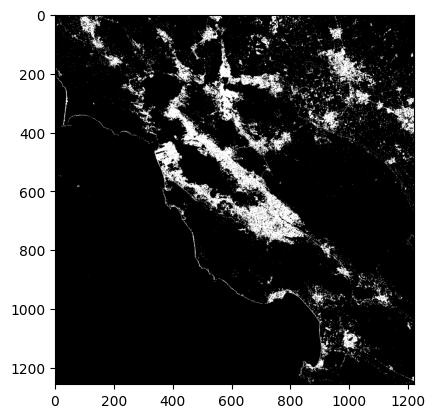

In [280]:
total_space = np.sum(colors_shiz[1])
land_space = np.sum(colors_shiz[1][:3])
urban_space = colors_shiz[1][2]
water_space = total_space - land_space
print(f'The percent of land in the image is {100*land_space/total_space}%')
print(f'The fraction of land covered by urban space is {100*urban_space/land_space}%')


labeled_image = np.array(imageIndexed) 
bw_urban = (labeled_image == 2)
plt.imshow(bw_urban, cmap = 'gray')

It seems as if the coastline is being classified as urban because there may be shadows. Also our classification ttechnique may be inacurate because the resolution of the image may be low...